# Fahrgastwechselzeiten

Lineare Regression für Funktionen für Fahrgastwechselzeit und gesamten Fahrgastwechselzeit.

1. Laden der Daten
2. Datenvorverarbeitung
3. Überblick über die Variablen
4. Zusammenhangsanalyse
5. Lineare Regessionen der Fahrgastwechselzeit 
    - Mit linearer Anstatzfunktion
    - Mit logarithmischer Ansatzfunktion
6. Lineare Regressionen für gesamte Fahrgastwechselzeit
    - Mit linearer Ansatzfunktion
    - Mit logarithmischer Ansatzfunktion

## Bibliotheken

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

## Stildefinition für Plots

In [2]:
plt.style.use("ba")

## Helferfunktionen

In [3]:
def load_data(path):
    return pd.DataFrame(pd.read_csv(path+file_suffix, sep=";"))

def plot_hist(df, ymax, xlabel, ylabel, filename, unit, std_unit="", prez=1, bins=20):
    mean = df.mean()
    std = df.std()
    median = df.median()
    maximum = df.max()
    minimum = df.min()
    
    plt.hist(df, bins=bins)
    
    plt.vlines(mean, ymin=0, ymax=ymax, label="Mittelwert: \n{0:.{1}f} {2}".format(mean, prez, unit))
    
    plt.vlines(mean-std, linestyle='--', ymin=0, ymax=ymax)
    plt.vlines(mean+std, linestyle='--', ymin=0, ymax=ymax)
    plt.arrow(mean, ymax+0.01, std, 0, width=0.01, length_includes_head=True, head_width=0.15, head_length=0.4, color='k')
    plt.arrow(mean+std, ymax+0.01, -std, 0, width=0.01, length_includes_head=True, head_width=0.15, head_length=0.4, color='k')
    plt.text(mean-(std*0.5), ymax+.1, "Std.: {0:.{1}f} {2}".format(std, prez, std_unit), fontsize=26)
    plt.arrow(mean, ymax+.01, -std, 0, width=.01, length_includes_head=True, head_width=0.15, head_length=0.4, color='k')
    plt.arrow(mean-std, ymax+.01, std, 0, width=.01, length_includes_head=True, head_width=0.15, head_length=0.4, color='k')
    
    plt.vlines(median, ymin=0, ymax=ymax, color='r', label="Median: \n{0:.{1}f} {2}".format(median, prez, unit))
    
    plt.ylim(0, ymax+.7)
    plt.legend()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.savefig("..\\Text\\pictures\\data_evaluation\\transferTime\\"+filename+".png")
    return

def linear(x, t, m):
    z = x*m +t
    return z 

def log(x, a, b, c):
    z = a  + b*np.log(x)+ c*x
    return z

def plot_conf_int_log(confidence_intervall, x, alpha=.05, color='black'):
    confidence_intervall = np.array(confidence_intervall)
    x_max = np.max([log(x, confidence_intervall[0,0], confidence_intervall[1,0], confidence_intervall[2,0]),
                    log(x, confidence_intervall[0,0], confidence_intervall[1,0], confidence_intervall[2,1]),
                    log(x, confidence_intervall[0,0], confidence_intervall[1,1], confidence_intervall[2,0]),
                    log(x, confidence_intervall[0,0], confidence_intervall[1,1], confidence_intervall[2,1]),
                    log(x, confidence_intervall[0,1], confidence_intervall[1,0], confidence_intervall[2,0]),
                    log(x, confidence_intervall[0,1], confidence_intervall[1,0], confidence_intervall[2,1]),
                    log(x, confidence_intervall[0,1], confidence_intervall[1,1], confidence_intervall[2,0]),
                    log(x, confidence_intervall[0,1], confidence_intervall[1,1], confidence_intervall[2,1])], axis=0)
    x_min = np.min([log(x, confidence_intervall[0,0], confidence_intervall[1,0], confidence_intervall[2,0]),
                    log(x, confidence_intervall[0,0], confidence_intervall[1,0], confidence_intervall[2,1]),
                    log(x, confidence_intervall[0,0], confidence_intervall[1,1], confidence_intervall[2,0]),
                    log(x, confidence_intervall[0,0], confidence_intervall[1,1], confidence_intervall[2,1]),
                    log(x, confidence_intervall[0,1], confidence_intervall[1,0], confidence_intervall[2,0]),
                    log(x, confidence_intervall[0,1], confidence_intervall[1,0], confidence_intervall[2,1]),
                    log(x, confidence_intervall[0,1], confidence_intervall[1,1], confidence_intervall[2,0]),
                    log(x, confidence_intervall[0,1], confidence_intervall[1,1], confidence_intervall[2,1])], axis=0)
    plt.fill_between(x, x_max, x_min, alpha=.1, color=color, label='Konfidenzintervall')
    return 

def plot_conf_int(confidence_intervall, function, x, alpha=.05, color='black'):
    confidence_intervall = np.array(confidence_intervall)
    x_max = np.max([function(x, confidence_intervall[0,0], confidence_intervall[1,0]),
                    function(x, confidence_intervall[0,1], confidence_intervall[1,1]),
                    function(x, confidence_intervall[0,0], confidence_intervall[1,1]),
                    function(x, confidence_intervall[0,1], confidence_intervall[1,0])], axis=0)
    x_min = np.min([function(x, confidence_intervall[0,0], confidence_intervall[1,0]),
                    function(x, confidence_intervall[0,1], confidence_intervall[1,1]),
                    function(x, confidence_intervall[0,0], confidence_intervall[1,1]),
                    function(x, confidence_intervall[0,1], confidence_intervall[1,0])], axis=0)
    plt.fill_between(x, x_max, x_min, alpha=.1, color=color, label='Konfidenzintervall')
    return 

## Laden der Daten

In [4]:
path = "Tabels/Times"
file_suffix = ".csv"

In [5]:
data_time = load_data(path)
#data_time

In [6]:
def door_count(df):
    count = 0
    for row in df:
        if row > 0:
            count += 1
    return count

doors_later = door_count(data_time['later alight']+data_time['later boarding'])
print("Anteile Türen Spätere = {:.2f}".format(doors_later/len(data_time)*100))

Anteile Türen Spätere = 35.71


## Datenvorverarbeitung
Berechung der Anzahlen für Fahrgäste

In [7]:
#Platzmacher werden doppelt gezählt da diese sowohl aussteigen als auch einsteigen.
core_persons = data_time['core alight']+data_time['core boarding']+2*data_time['spacemaker']

alight = data_time['core alight']+data_time['later alight']
boarding = data_time['core boarding']+data_time['later boarding']
persons = alight+boarding+2*data_time['spacemaker']

core_time = data_time['core time']
time = data_time['time']

## Beschreibung der Verteilung 

### Personen und Fahrgastwechselzeit

In [8]:
print("Anzahl Personen liegt zwischen {0:d} und {1:d} Personen".format(persons.min(), persons.max()))
print("Haupsächlich zwischen {0:.2f} und {1:.2f} Personen".format(persons.mean()-persons.std(), persons.mean()+persons.std()))
print()
print("Fahrgastwechselzeit liegt zwischen {0:.1f} und {1:.1f} Sekunden".format(time.min(), time.max()))
print("Haupsächlich zwischen {0:.1f} und {1:.1f} Sekunden".format(time.mean()-time.std(), time.mean()+time.std()))

Anzahl Personen liegt zwischen 3 und 53 Personen
Haupsächlich zwischen 9.76 und 32.57 Personen

Fahrgastwechselzeit liegt zwischen 3.4 und 41.2 Sekunden
Haupsächlich zwischen 9.9 und 26.5 Sekunden


### Kern-Personen und Kernwechselzeit

#### Histogramme

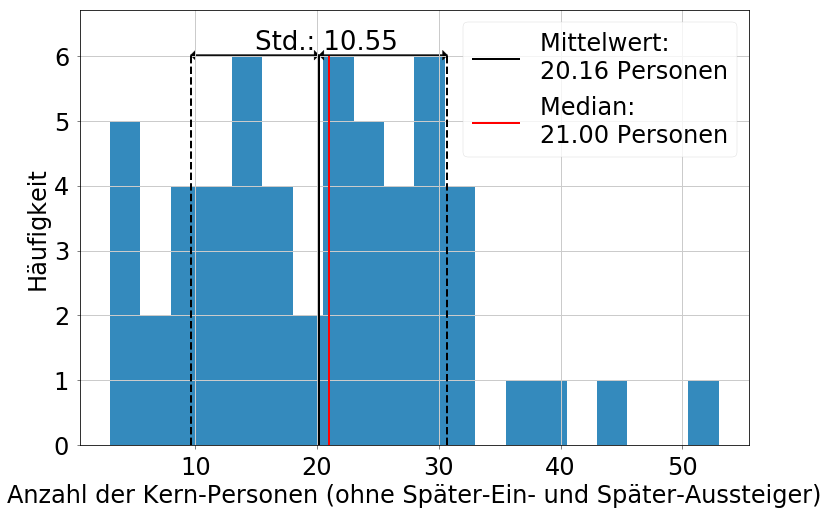

In [9]:
plot_hist(core_persons, 6, "Anzahl der Kern-Personen (ohne Später-Ein- und Später-Aussteiger)", "Häufigkeit", "hist_core_persons", "Personen", prez=2)

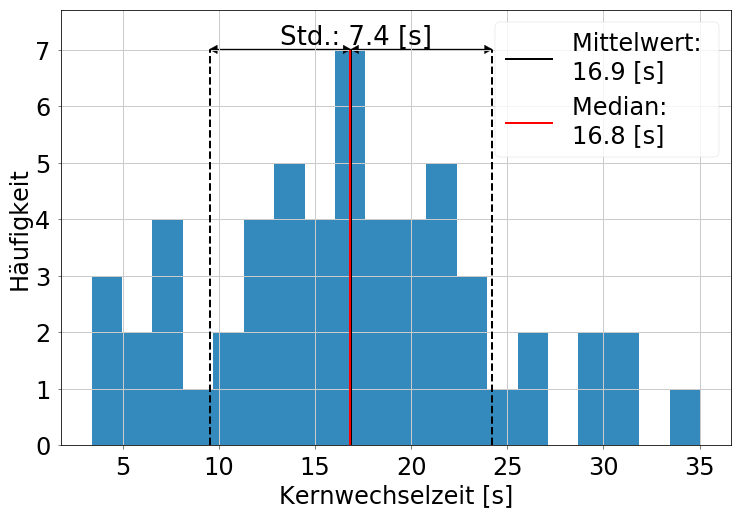

In [10]:
plot_hist(core_time, 7, "Kernwechselzeit [s]", "Häufigkeit", "hist_core_transfer_time", "[s]", "[s]")

#### Allegemeine Infos

In [11]:
print("Anzahl der Kern-Personen liegt zwischen {0:d} und {1:d} Personen".format(core_persons.min(), core_persons.max()))
print("Haupsächlich zwischen {0:.2f} und {1:.2f} Personen".format(core_persons.mean()-core_persons.std(), core_persons.mean()+core_persons.std()))
print()
print("Kernwechselzeit liegt zwischen {0:.1f} und {1:.1f} Sekunden".format(core_time.min(), core_time.max()))
print("Haupsächlich zwischen {0:.1f} und {1:.1f} Sekunden".format(core_time.mean()-core_time.std(), core_time.mean()+core_time.std()))

Anzahl der Kern-Personen liegt zwischen 3 und 53 Personen
Haupsächlich zwischen 9.61 und 30.71 Personen

Kernwechselzeit liegt zwischen 3.4 und 35.0 Sekunden
Haupsächlich zwischen 9.5 und 24.2 Sekunden


## Grafische Zusammenhangsanalyse

### Zusammenhang Kern-Personen Kernwechselzeit

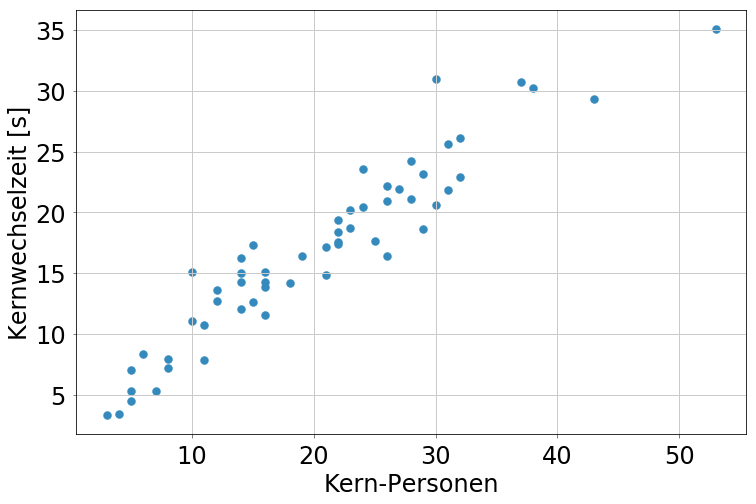

In [12]:
plt.scatter(core_persons, core_time)
plt.xlabel('Kern-Personen')
plt.ylabel('Kernwechselzeit [s]')
plt.axis('scaled')
plt.savefig("..\\Text\\pictures\\data_evaluation\\transferTime\\core_coherence_analysis.png")

### Zusammenhang alle Personen und gesamte Fahrgastwechselzeit

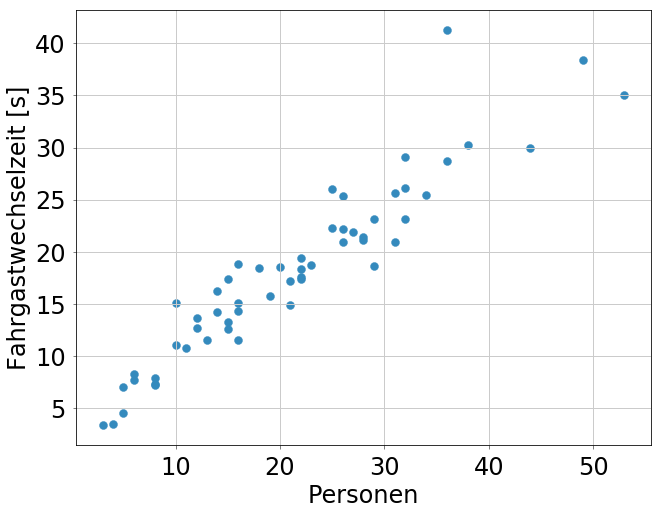

In [13]:
plt.scatter(persons, time)
plt.xlabel('Personen')
plt.ylabel('Fahrgastwechselzeit [s]')
plt.axis('scaled')
plt.savefig("..\\Text\\pictures\\data_evaluation\\transferTime\\coherence_analysis.png")

## Lineare Regressionen für Kernwechselzeit

### Modell:
$core\_time = c_1 + c_2 \cdot core\_persons$

In [14]:
res_lin = smf.ols(formula="core_time ~ core_persons", data=data_time).fit()

print("R^2 = {:.2f}".format(res_lin.rsquared))
print("p-value of the F-Test = {:.1e}".format(res_lin.f_pvalue))
print("p-value for t-Test of intercept = {:.1e}".format(res_lin.t_test([1, 0]).pvalue))
print("p-value for t-Test of c2 = {:.1e}".format(res_lin.t_test([0, 1]).pvalue))

res_lin.summary(alpha=.01)

R^2 = 0.90
p-value of the F-Test = 2.0e-28
p-value for t-Test of intercept = 3.7e-06
p-value for t-Test of c2 = 2.0e-28


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              core_time   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     474.4
Date:                Wed, 21 Aug 2019   Prob (F-statistic):           2.05e-28
Time:                        07:20:06   Log-Likelihood:                -126.83
No. Observations:                  56   AIC:                             257.7
Df Residuals:                      54   BIC:                             261.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.005      0.995]
--------------------------------------------------------------------------------
Intercept        3.5477      0.689      5.152      0.000       1.709       5.386
core_persons     0.6603      0.030     21.780      0.000       0.579       0.741
==============================================================================
Omnibus:                        5.533   Durbin-Watson:                   1.412
Prob(Omnibus):                  0.063   Jarque-Bera (JB):                4.490
Skew:                           0.597   Prob(JB):                        0.106
Kurtosis:                       3.707   Cond. No.                         49.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

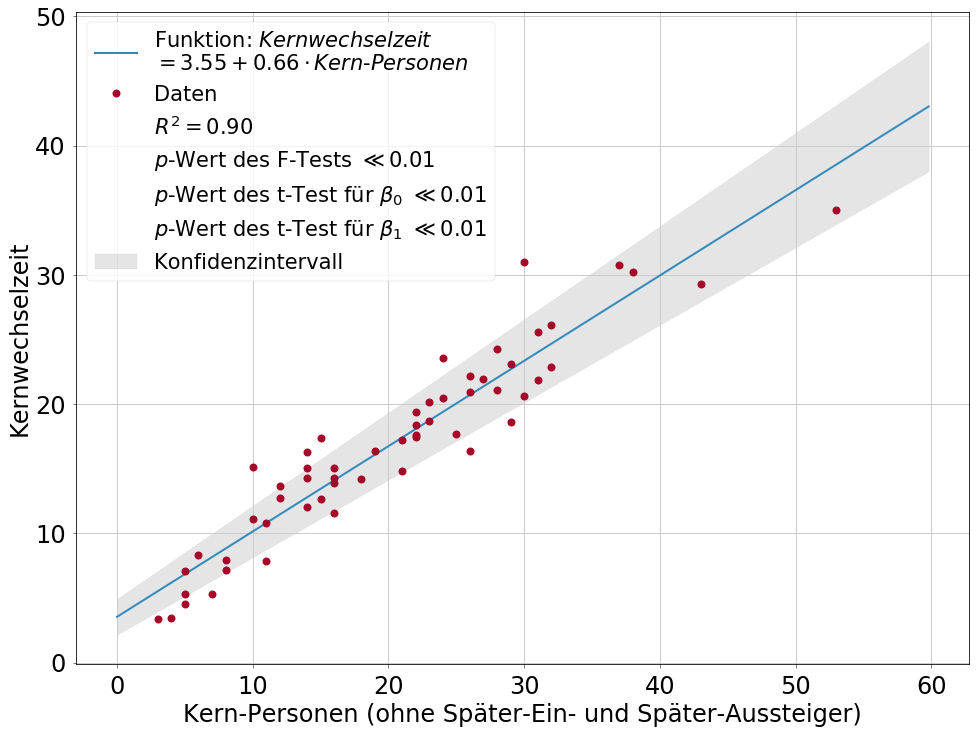

In [15]:
ps = np.arange(0, 60, 0.2)

y_lin = res_lin.params['Intercept'] + res_lin.params['core_persons']*ps
funktion = "$Kernwechselzeit$ \n$= {0:.2f} + {1:.2f} \cdot Kern$-$Personen$".format(res_lin.params['Intercept'], res_lin.params['core_persons'])


plt.figure(figsize=(16, 12))
plot_conf_int(res_lin.conf_int(), linear, ps, alpha=.05, color='black')

plt.plot(ps, y_lin, label="Funktion: "+funktion)
plt.plot(core_persons, core_time, 'o', label='Daten')
plt.plot([], [], ' ', label="$R^2 = {:.2f}$".format(res_lin.rsquared))
plt.plot([], [], ' ', label="$p$-Wert des F-Tests $\ll 0.01$")
plt.plot([], [], ' ', label="$p$-Wert des t-Test für $\\beta_0$ $\ll 0.01$")
plt.plot([], [], ' ', label="$p$-Wert des t-Test für $\\beta_1$ $\ll 0.01$")

plt.xlabel('Kern-Personen (ohne Später-Ein- und Später-Aussteiger)')
plt.ylabel('Kernwechselzeit')
plt.legend(fontsize=21, loc='upper left')

plt.savefig("..\\Text\\pictures\\data_evaluation\\transferTime\\lin_core_transfer_time.png")

### Modell:
$core\_time = c_1 + c_2 \cdot \log(core\_persons) + c_3 \cdot core\_persons$

In [16]:
res_log = smf.ols(formula="core_time ~ np.log(core_persons) + core_persons", data=data_time).fit()
print("R^2 = {:.2f}".format(res_log.rsquared))
print("p-value for the F-Test = {:.1e}".format(res_log.f_pvalue))
print("p-value for the t-Test of intercept = {:.2f}".format(res_log.t_test([1, 0, 0]).pvalue))
print("p-value for the t-Test of c2 = {:.3f}".format(res_log.t_test([0, 1, 0]).pvalue))
print("p-value for the t-Test of c3 = {:.1e}".format(res_log.t_test([0, 0, 1]).pvalue))
res_log.summary()

R^2 = 0.91
p-value for the F-Test = 3.8e-28
p-value for the t-Test of intercept = 0.41
p-value for the t-Test of c2 = 0.021
p-value for the t-Test of c3 = 5.1e-07


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              core_time   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     260.7
Date:                Wed, 21 Aug 2019   Prob (F-statistic):           3.75e-28
Time:                        07:20:07   Log-Likelihood:                -123.97
No. Observations:                  56   AIC:                             253.9
Df Residuals:                      53   BIC:                             260.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -2.0227      2.425     -0.834      0.408      -6.886       2.841
np.log(core_persons)     3.2839      1.375      2.388      0.021       0.525       6.043
core_persons             0.4746      0.083      5.716      0.000       0.308       0.641
==============================================================================
Omnibus:                        8.000   Durbin-Watson:                   1.379
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                7.780
Skew:                           0.656   Prob(JB):                       0.0204
Kurtosis:                       4.269   Cond. No.                         209.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

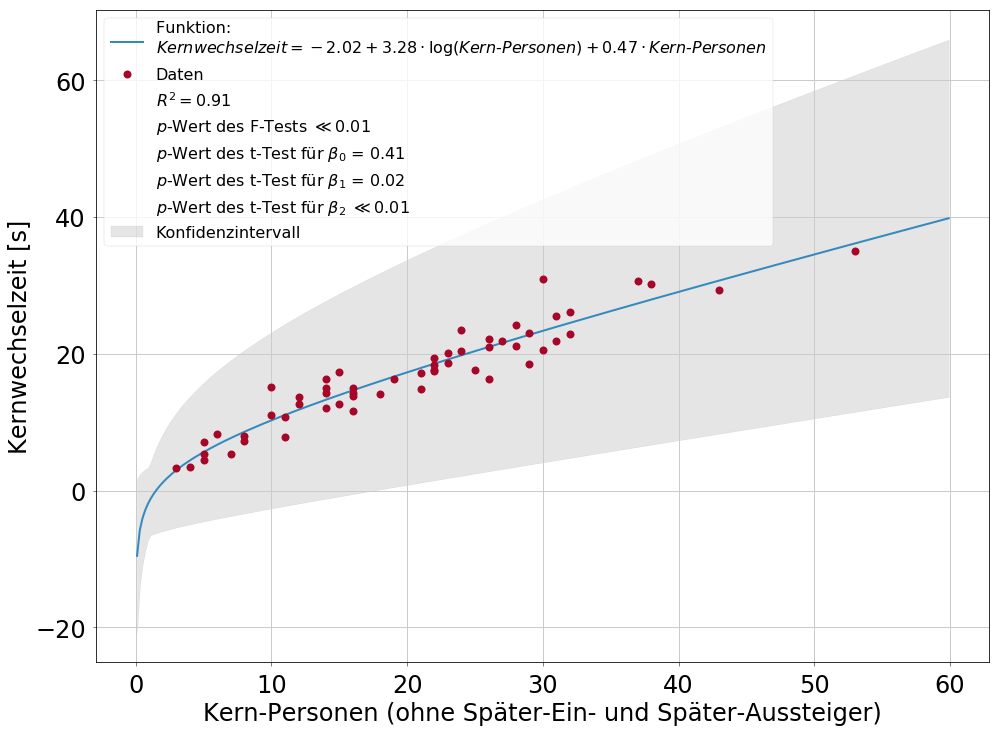

In [17]:
ps = np.arange(0.1, 60, 0.2)
plt.figure(figsize=(16, 12))
y_log = res_log.params['Intercept'] + res_log.params['np.log(core_persons)']*np.log(ps) + res_log.params['core_persons']*ps
funktion = "$Kernwechselzeit = {0:.2f} + {1:.2f} \cdot \log(Kern$-$Personen) + {2:.2f} \cdot Kern$-$Personen$".format(res_log.params['Intercept'],res_log.params['np.log(core_persons)'], res_log.params['core_persons'])
plot_conf_int_log(res_log.conf_int(), ps, alpha=.05, color='black')
plt.plot(ps, y_log, label="Funktion: \n"+funktion)
plt.plot(core_persons, core_time, 'o', label='Daten')
plt.plot([], [], ' ', label="$R^2 = {:.2f}$".format(res_log.rsquared))
plt.plot([], [], ' ', label="$p$-Wert des F-Tests $\ll 0.01$")
plt.plot([], [], ' ', label="$p$-Wert des t-Test für $\\beta_0$ = {:.2f}".format(res_log.t_test([1, 0, 0]).pvalue))
plt.plot([], [], ' ', label="$p$-Wert des t-Test für $\\beta_1$ = {:.2f}".format(res_log.t_test([0, 1, 0]).pvalue))
plt.plot([], [], ' ', label="$p$-Wert des t-Test für $\\beta_2$ $\ll 0.01$")
plt.xlabel('Kern-Personen (ohne Später-Ein- und Später-Aussteiger)')
plt.ylabel('Kernwechselzeit [s]')
plt.legend(fontsize=16, loc='upper left')
#plt.savefig("..\..\Text\pictures\\transferTime\\logRegWaiting.png")

## Lineare Regressionen für Fahrgastwechselzeit

### Modell:
$time = c_1 + c_2 \cdot persons$

In [18]:
res_lin_all = smf.ols(formula="time ~ persons", data=data_time).fit()
print("R^2 = {:.3f}".format(res_lin_all.rsquared))
print("p-value of the F-Test = {:.1e}".format(res_lin_all.f_pvalue))
print("p-value for t-Test of intercept = {:.1e}".format(res_lin_all.t_test([1, 0]).pvalue))
print("p-value for t-Test of c2 = {:.1e}".format(res_lin_all.t_test([0, 1]).pvalue))
res_lin_all.summary(alpha=.01)

R^2 = 0.882
p-value of the F-Test = 1.0e-26
p-value for t-Test of intercept = 4.0e-05
p-value for t-Test of c2 = 1.0e-26


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   time   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     403.6
Date:                Wed, 21 Aug 2019   Prob (F-statistic):           1.00e-26
Time:                        07:20:08   Log-Likelihood:                -137.87
No. Observations:                  56   AIC:                             279.7
Df Residuals:                      54   BIC:                             283.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.005      0.995]
------------------------------------------------------------------------------
Intercept      3.6686      0.820      4.476      0.000       1.480       5.857
persons        0.6864      0.034     20.091      0.000       0.595       0.778
==============================================================================
Omnibus:                       33.430   Durbin-Watson:                   1.652
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.016
Skew:                           1.633   Prob(JB):                     1.16e-22
Kurtosis:                       8.712   Cond. No.                         51.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

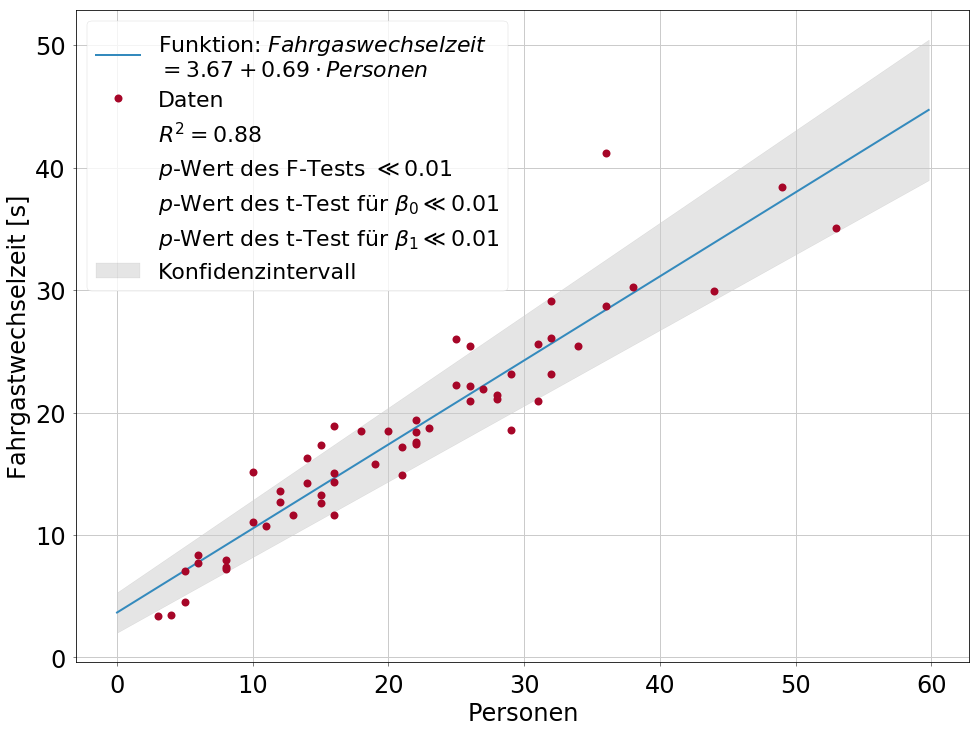

In [19]:
ps = np.arange(0, 60, 0.2)
plt.figure(figsize=(16, 12))
y_lin_all = res_lin_all.params['Intercept'] + res_lin_all.params['persons']*ps
funktion = "$Fahrgaswechselzeit$ \n$= {0:.2f} + {1:.2f} \cdot Personen$".format(res_lin_all.params['Intercept'], res_lin_all.params['persons'])
plt.plot(ps, y_lin_all, label='Funktion: '+funktion)
plot_conf_int(res_lin_all.conf_int(), linear, ps, alpha=.05, color='black')
plt.plot(persons, time, 'o', label='Daten')
plt.plot([], [], ' ', label="$R^2 = {:.2f}$".format(res_lin_all.rsquared))
plt.plot([], [], ' ', label="$p$-Wert des F-Tests $\ll 0.01$")
plt.plot([], [], ' ', label="$p$-Wert des t-Test für $\\beta_0 \ll 0.01$")
plt.plot([], [], ' ', label="$p$-Wert des t-Test für $\\beta_1 \ll 0.01$")
plt.xlabel('Personen')
plt.ylabel('Fahrgastwechselzeit [s]')
plt.legend(fontsize=22)
plt.savefig("..\\Text\\pictures\\data_evaluation\\transferTime\\lin_transfer_time.png")

### Modell:
$time = c_1 + c_3 \cdot \log(persons) + c_2 \cdot persons$

In [20]:
res_log_all = smf.ols(formula="time ~ np.log(persons) + persons", data=data_time).fit()
print("R^2 = {:.3f}".format(res_log_all.rsquared))
print("p-value for the F-Test = {:.1e}".format(res_log_all.f_pvalue))
print("p-value for the t-Test of intercept = {:.2f}".format(res_log_all.t_test([1, 0, 0]).pvalue))
print("p-value for the t-Test of c2 = {:.2f}".format(res_log_all.t_test([0, 1, 0]).pvalue))
print("p-value for the t-Test of c3 = {:.1e}".format(res_log_all.t_test([0, 0, 1]).pvalue))
res_log_all.summary()

R^2 = 0.889
p-value for the F-Test = 5.3e-26
p-value for the t-Test of intercept = 0.61
p-value for the t-Test of c2 = 0.08
p-value for the t-Test of c3 = 8.1e-07


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   time   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     211.7
Date:                Wed, 21 Aug 2019   Prob (F-statistic):           5.32e-26
Time:                        07:20:09   Log-Likelihood:                -136.21
No. Observations:                  56   AIC:                             278.4
Df Residuals:                      53   BIC:                             284.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.5459      3.015     -0.513      0.610      -7.593       4.501
np.log(persons)     2.9777      1.659      1.795      0.078      -0.351       6.306
persons             0.5279      0.094      5.590      0.000       0.339       0.717
==============================================================================
Omnibus:                       39.960   Durbin-Watson:                   1.644
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.298
Skew:                           1.896   Prob(JB):                     5.15e-34
Kurtosis:                      10.164   Cond. No.                         218.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

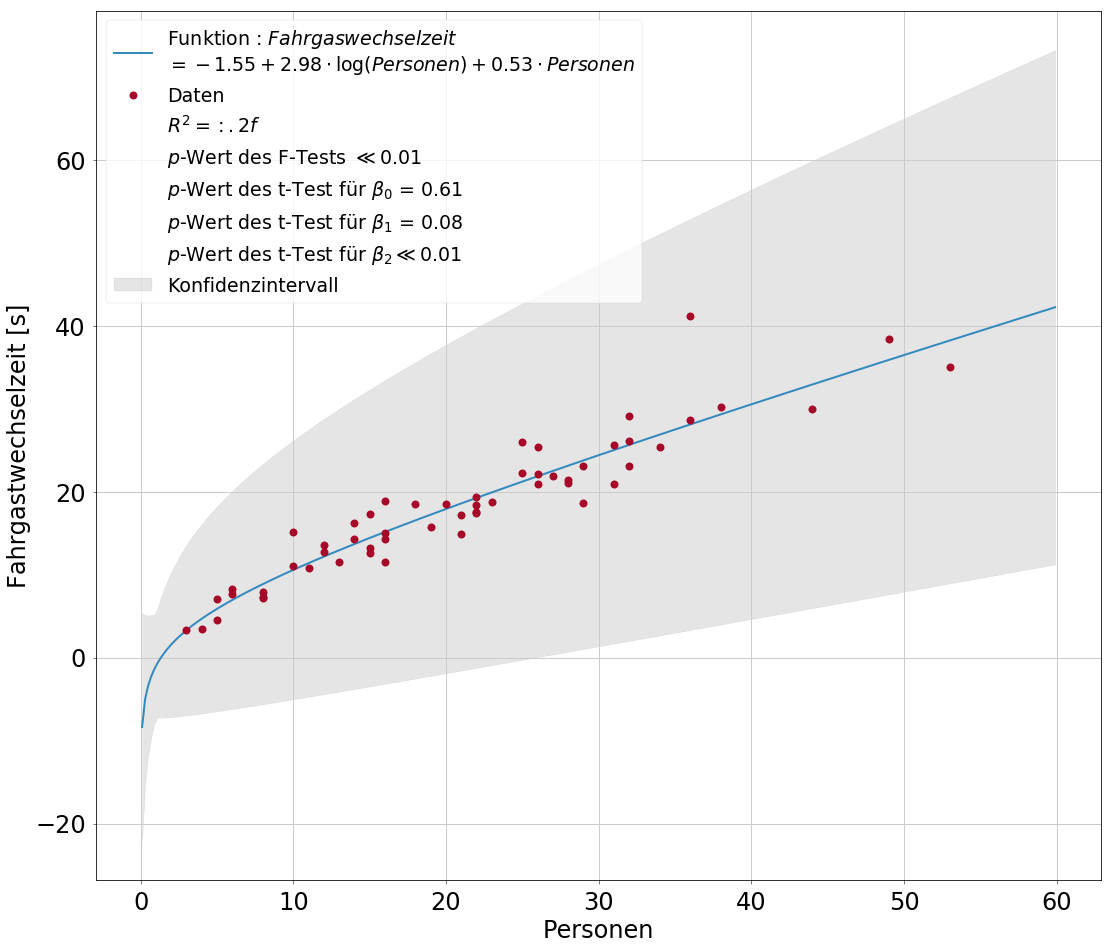

In [21]:
ps = np.arange(0.1, 60, 0.2)
plt.figure(figsize=(18, 16))
y_log_all = res_log_all.params['Intercept'] + res_log_all.params['np.log(persons)']*np.log(ps) + res_log_all.params['persons']*ps
funktion = "$Fahrgaswechselzeit$ \n$= {0:.2f} + {1:.2f} \cdot \log(Personen) + {2:.2f} \cdot Personen$".format(res_log_all.params['Intercept'],res_log_all.params['np.log(persons)'], res_log_all.params['persons'])
plt.plot(ps, y_log_all, label='Funktion : '+funktion)
plot_conf_int_log(res_log_all.conf_int(), ps, alpha=.05, color='black')
plt.plot(persons, time, 'o', label='Daten')
plt.plot([], [], ' ', label="$R^2 = {:.2f}$")
plt.plot([], [], ' ', label="$p$-Wert des F-Tests $\ll 0.01$".format(res_log_all.f_pvalue))
plt.plot([], [], ' ', label="$p$-Wert des t-Test für $\\beta_0$ = {:.2f}".format(res_log_all.t_test([1, 0, 0]).pvalue))
plt.plot([], [], ' ', label="$p$-Wert des t-Test für $\\beta_1$ = {:.2f}".format(res_log_all.t_test([0, 1, 0]).pvalue))
plt.plot([], [], ' ', label="$p$-Wert des t-Test für $\\beta_2 \ll 0.01$")
plt.xlabel('Personen')
plt.ylabel('Fahrgastwechselzeit [s]')
plt.legend(fontsize=19, loc='upper left')